# Visualization

Support six different format of data.

1. raw data label `COCO`
    + `./data/coco/*.jpg`
    + `./data/coco/coco.json`

2. raw data label `VOC`
    + `./data/voc/*.jpg`
    + `./data/voc/*.xml`

3. raw data label `YOLO`
    + `./data/yolo/*.txt`
    + `./data/yolo/*.jpg`

<br>

+ the following types use the defintion of `general format`:
    ```bash
    {
        file_name: {
            "boxes": list shape=(boxes, 4),
            "preds": list shape=(boxes, classes+1)
        },
        ...
    }
    ```
    where boxes format is:
    + coco: (xmin, ymin, w, h) int
    + voc: (xmin, ymin, xmax, ymax) int
    + yolo: (cx, cy, w, h) float
    
+ if the prediction is already in `coco`, `voc`, `yolo`, use the above 3.

+ otherwise, the below 3 focus on prediction in `general format`. <br>

+ PS. raw data label in the following are **`optional`**


<br>

4. raw data label `COCO` + prediction `general format`
    + `./data/coco/*.jpg`
    + `./data/coco/coco.json` (Optional)
    + `./pred/coco_box.json`

5. raw data label `VOC` + prediction `general format` 
    + `./data/voc/*.jpg`
    + `./data/voc/*.xml` (Optional)
    + `./pred/voc_box.json`

6. raw data label `YOLO` + prediction `general format`
    + `./data/yolo/*.jpg`
    + `./data/yolo/*.txt` (Optional)
    + `./pred/yolo_box.json`


In [6]:
ROOT = "/Users/james.chao/Desktop/codeMore/mygithub/Object-Detection-Tools"

import glob
import json
import sys
from typing import Dict, List, Tuple
sys.path.append(ROOT)

import numpy as np

from visualization import show

help(show)

Help on function show in module visualization.visualization:

show(class_list, img_path, ant_path='', pd_boxes_type='', pd_boxes=None, pd_cids=None, pd_cfs=None, save_path='', box_width=4, value_ratios=(1, 1))
    This function helps visualize an image with varies format of label or prediction.
    
    + class_list: list[str]. List of class names
    + img_path: str. Path to the image (e.g. *.jpg, ... etc.)
    + ant_path: str or None. Path to the annotation (e.g. *.voc, *.txt, *.json). If None, show black img only.
    
    + pd_boxes_type: str. '' or 'voc' or 'yolo' or 'yolo_int' or 'coco'. If None, show black only, (pd_boxes, pd_cids, pd_cfs) are not used.
    + pd_boxes: None or ndarray in shape (N,4)
    + pd_cids: None or ndarray in shape (N,) class index
    + pd_cfs: None or ndarray in shape (N,) confidence
    
    + save_folder: str or None. Save at the folder with same filename. If None, show only but not save.
    + box_width: int. Predicted boxes width.
    + value_ratios

### 1. raw data label `COCO`

fill cache


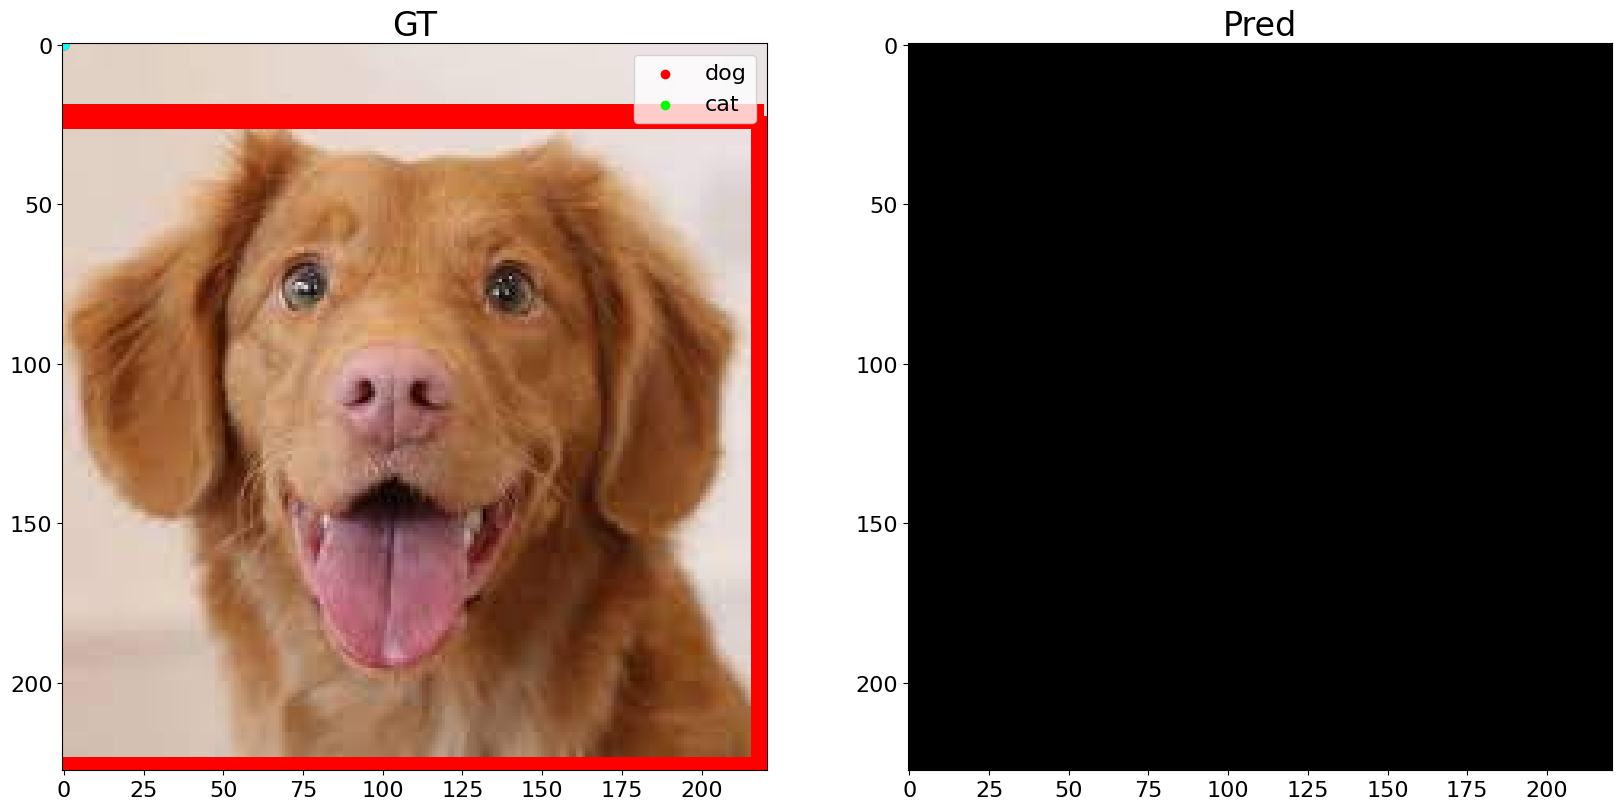

fill cache


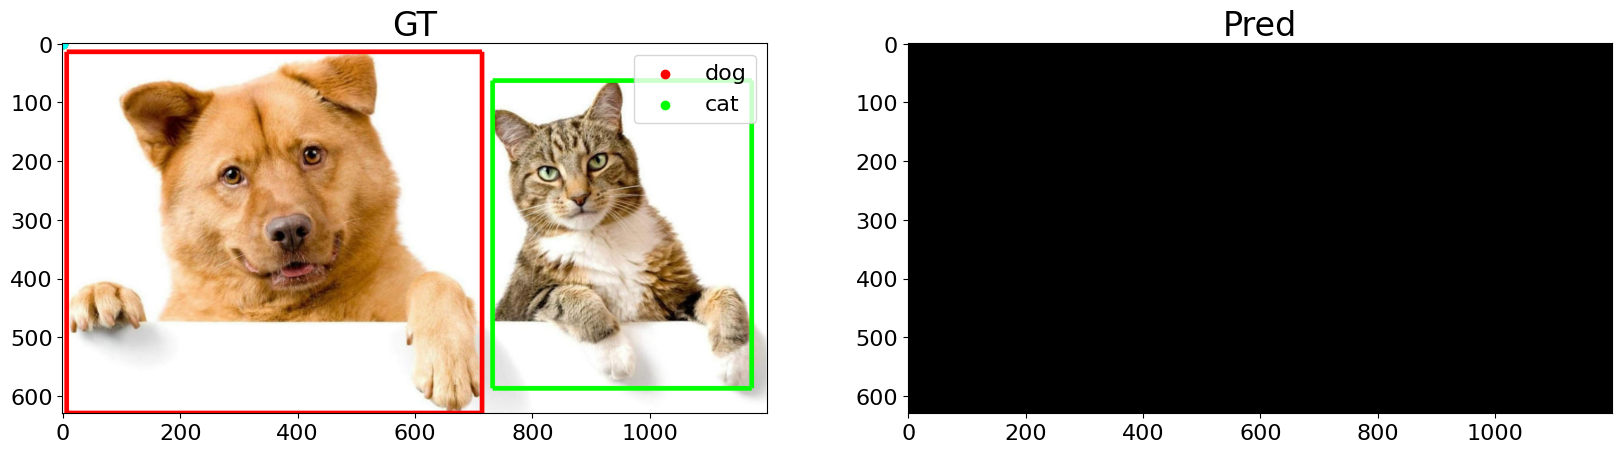

fill cache


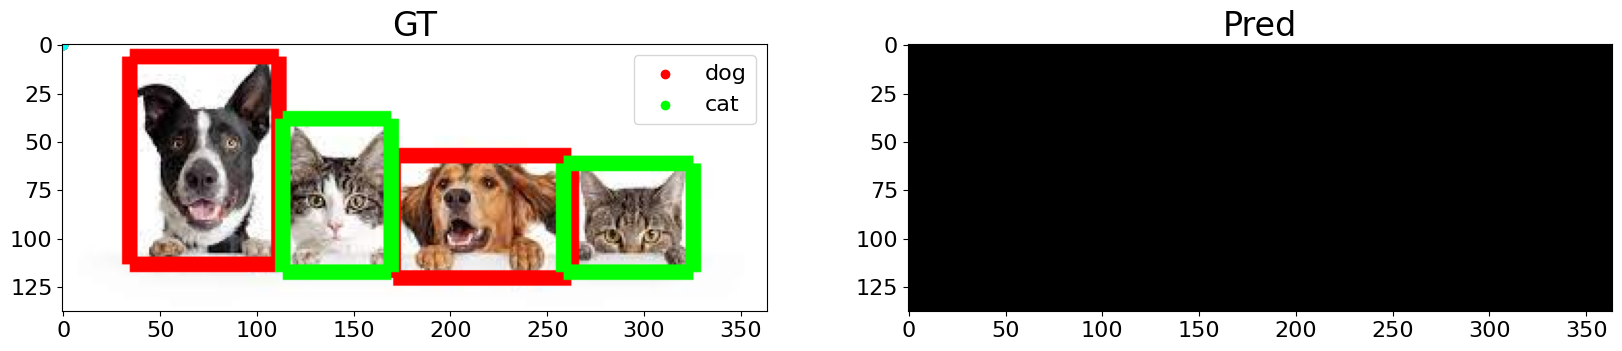

In [12]:
for i in range(3):
    show(['dog','cat'], f"./data/coco/pic{i}.jpg", f"./data/coco/coco.json")

### 2. raw data label `VOC`

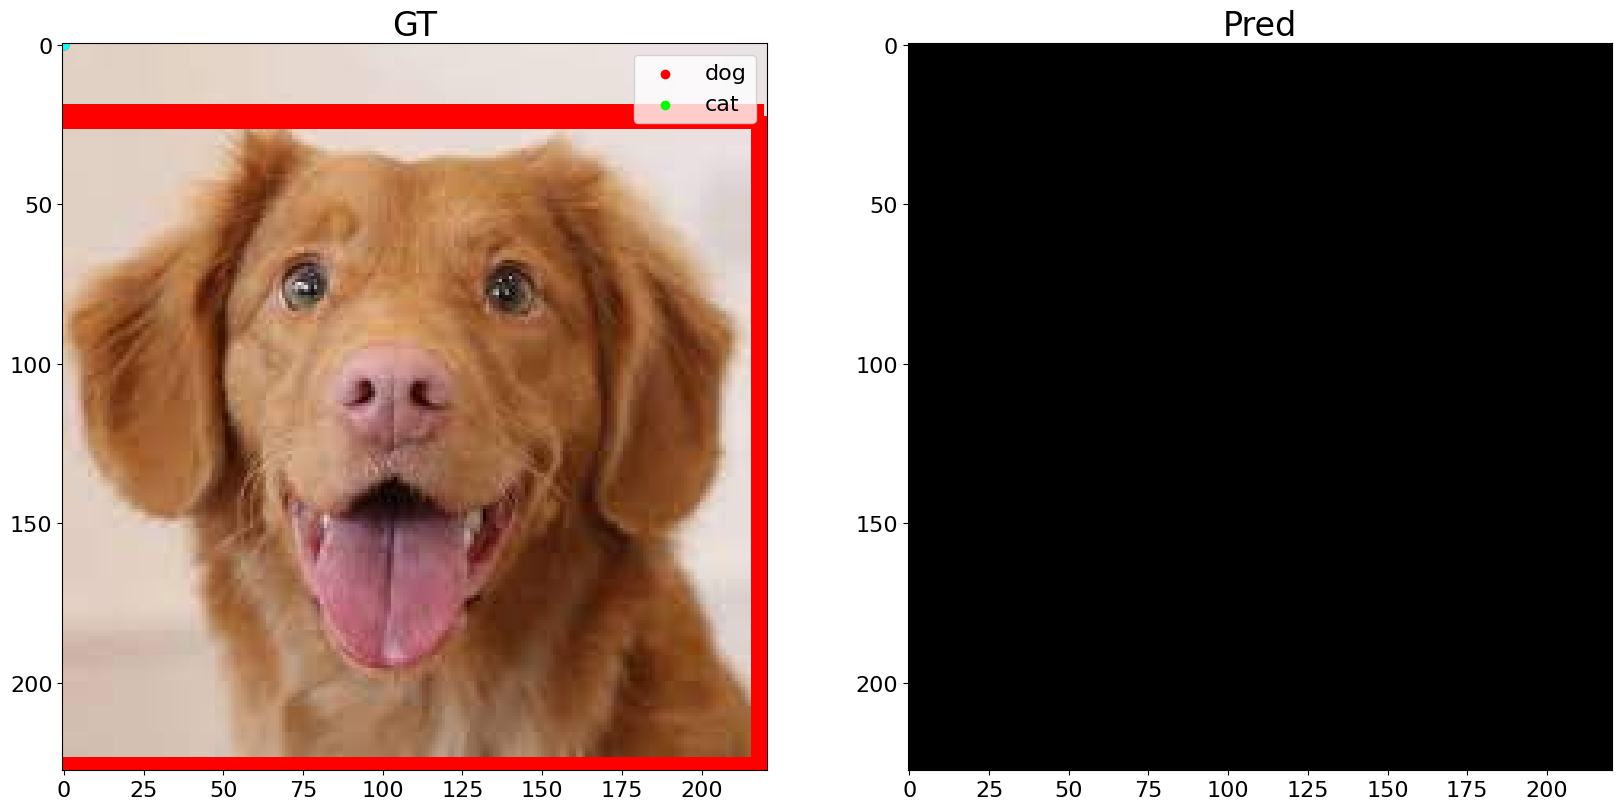

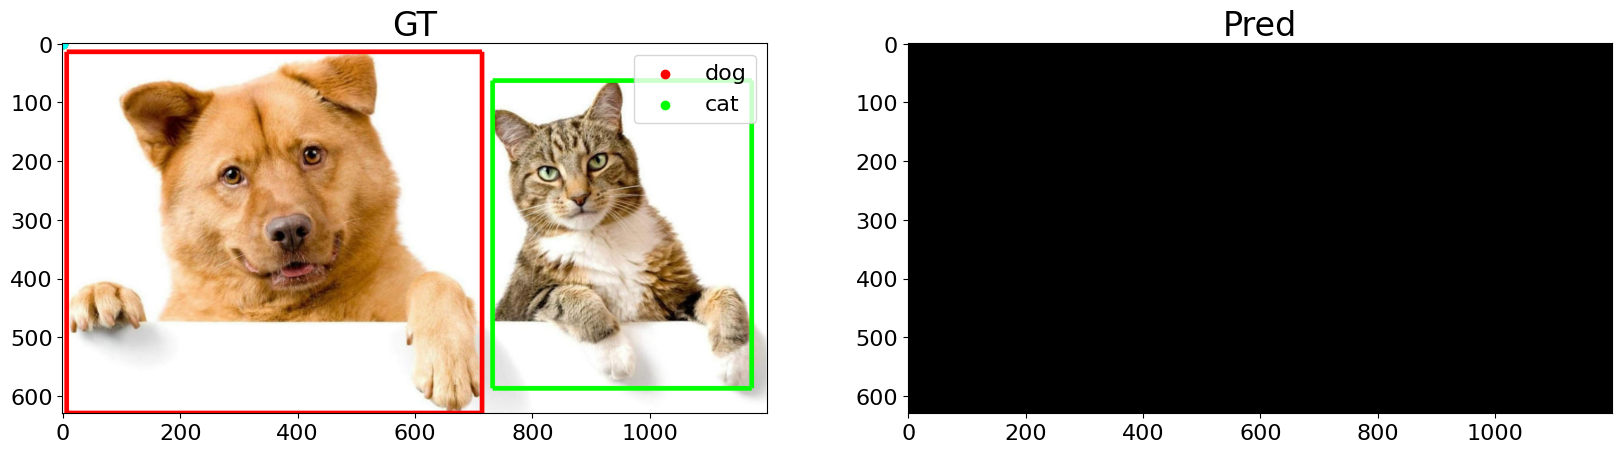

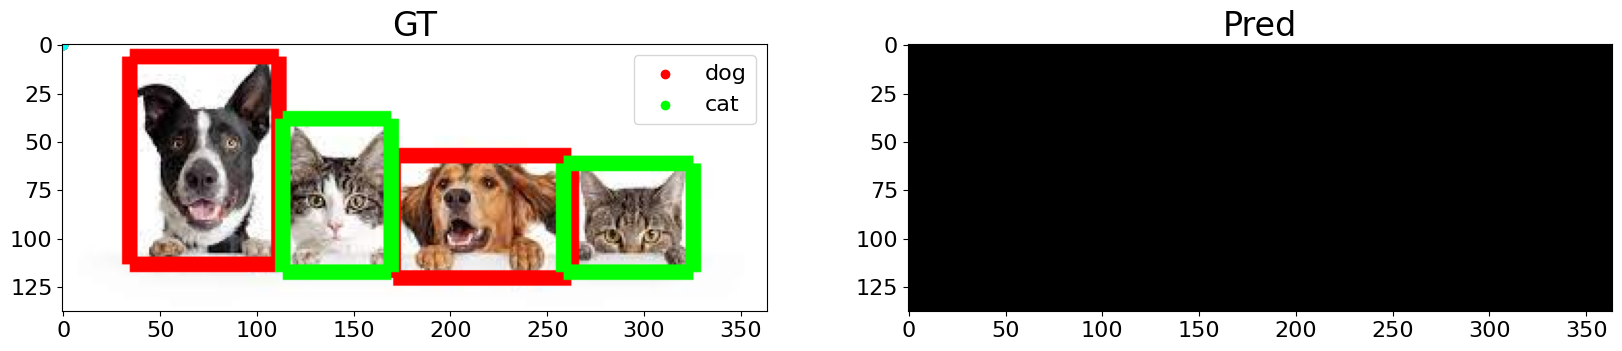

In [13]:
for i in range(3):
    show(['dog','cat'], f"./data/voc/pic{i}.jpg", f"./data/voc/pic{i}.xml")

### 3. raw data label `YOLO`

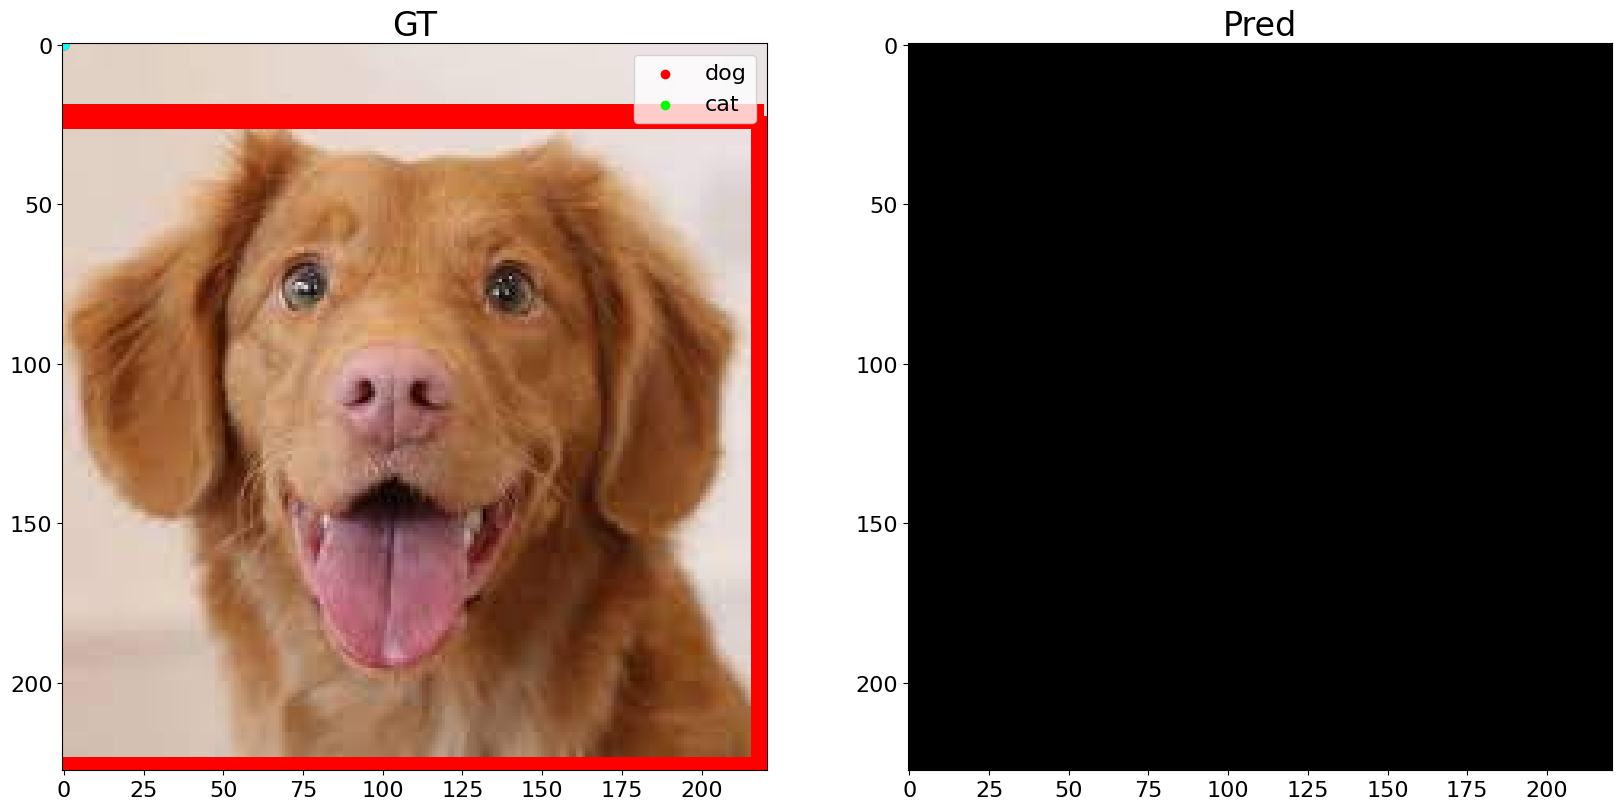

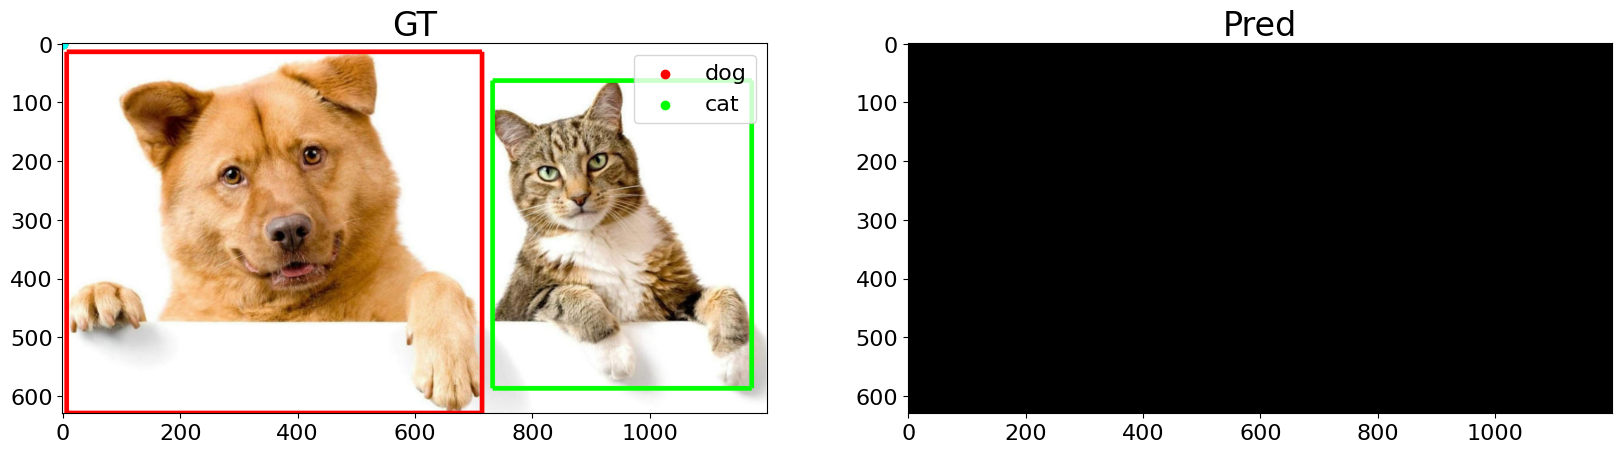

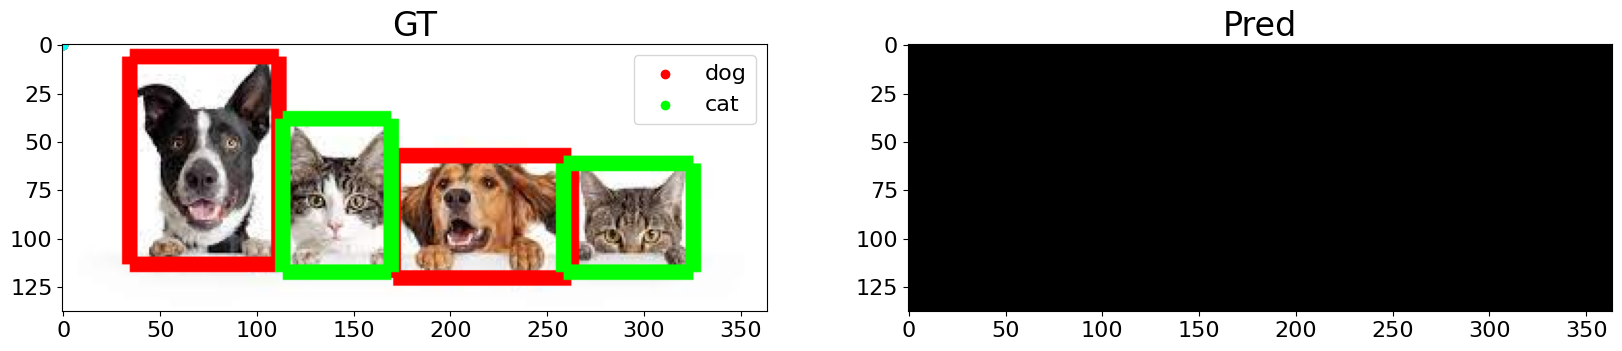

In [14]:
for i in range(3):
    show(['dog','cat'], f"./data/yolo/pic{i}.jpg", f"./data/yolo/pic{i}.txt")

### Before the following code, prepare prediction in `general format` first.

In [7]:
def get_pd_boxes_cids_cfs(case_pred_dict: Dict[str, List[float]]) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
    """
    Args:
        case_pred_dict (dict)
            boxes (List[List[float or int]])
            preds (List[List[float]])
    Returns:
        pd_boxes (np.ndarray): shape=(boxes, classes+1)
        pd_cids (np.ndarray): shape=(boxes,) int
        pd_cfs (np.ndarray): shape=(boxes,) float
    """
    print(case_pred_dict)
    pd_boxes = case_pred_dict["boxes"]
    pd_cids = np.array(case_pred_dict["preds"]).argmax(axis=1)
    pd_cfs =  np.array(case_pred_dict["preds"]).max(axis=1)
    return pd_boxes, pd_cids, pd_cfs

### 4. raw data label `COCO` + prediction `general format`

{'boxes': [[0, 23, 220, 205], [30, 90, 50, 60]], 'preds': [[0.95, 0.05, 0.0], [0.2, 0.8, 0.0]]}
fill cache


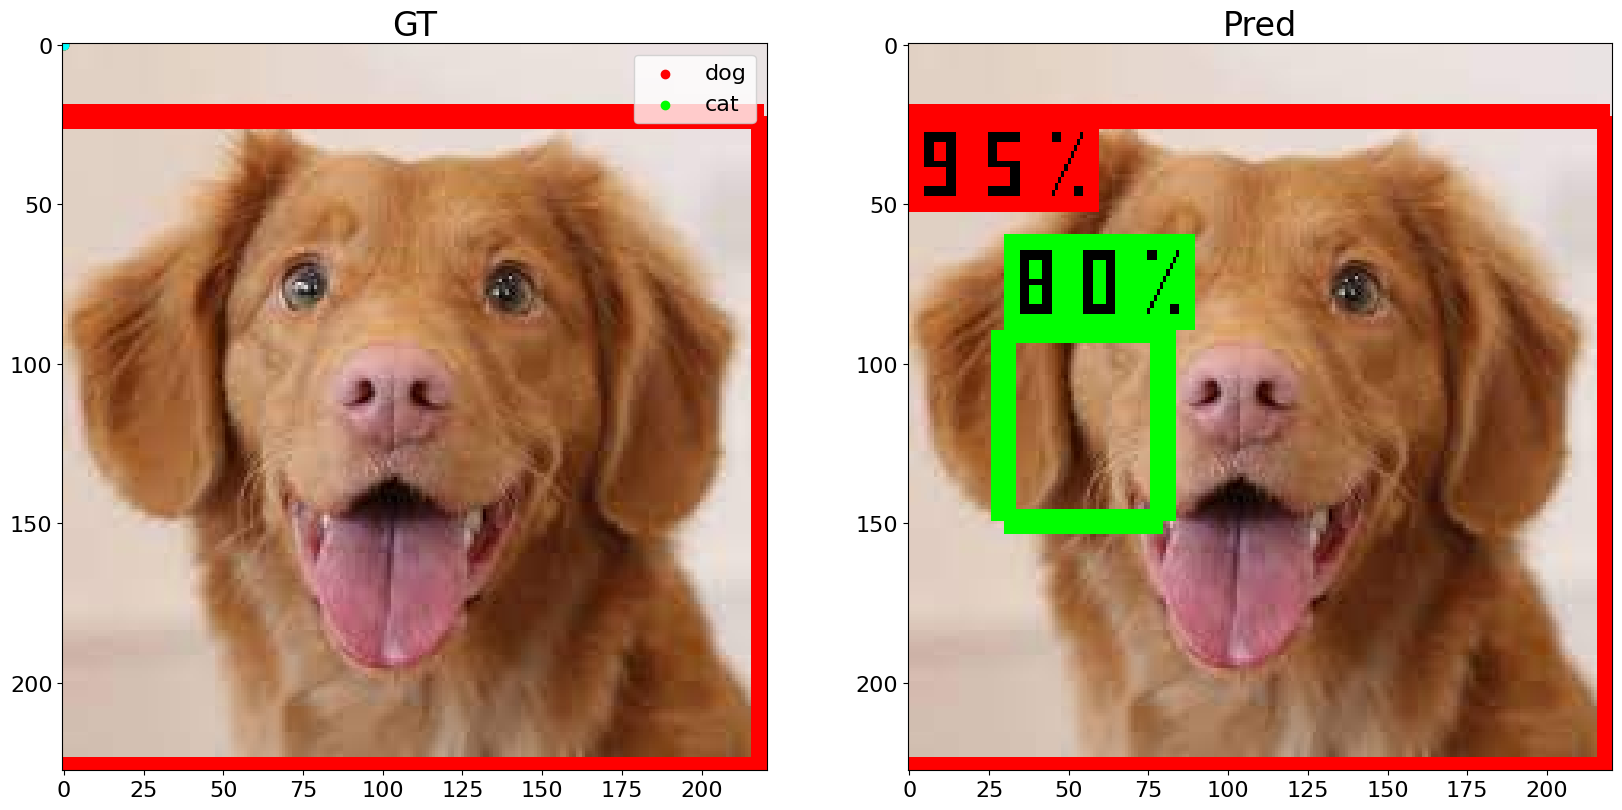

{'boxes': [[8, 15, 707, 615], [733, 64, 441, 524]], 'preds': [[0.85, 0.05, 0.1], [0.6, 0.4, 0.0]]}
fill cache


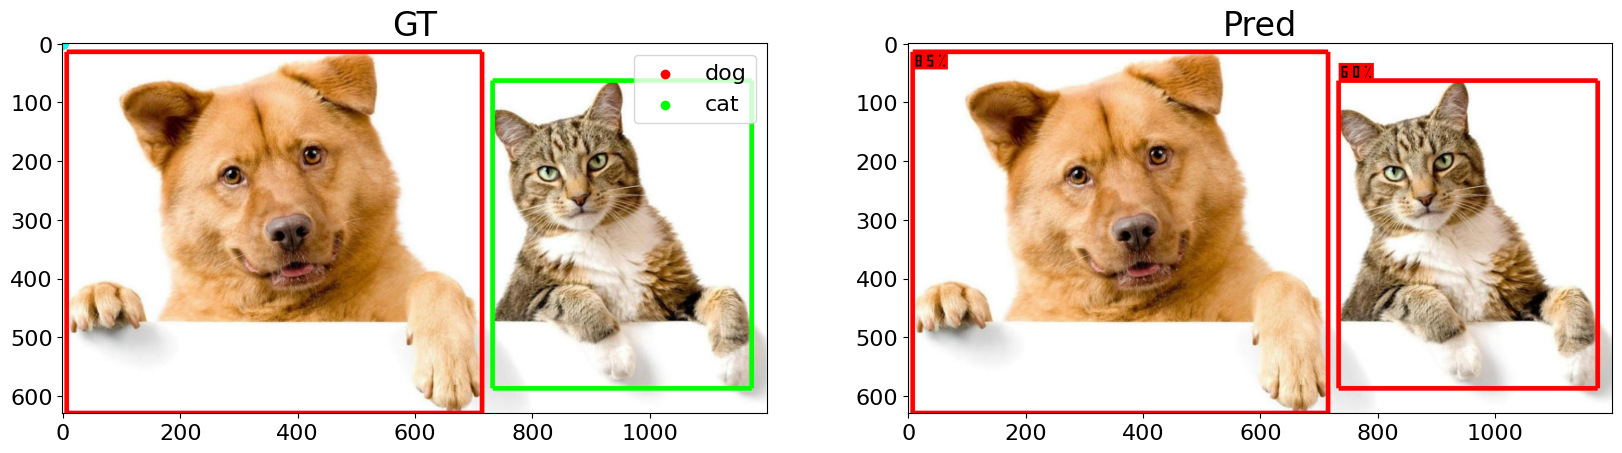

{'boxes': [[35, 7, 77, 107], [171, 58, 40, 30], [114, 39, 56, 79]], 'preds': [[0.75, 0.25, 0.0], [0.45, 0.2, 0.35], [0.01, 0.99, 0.0]]}
fill cache


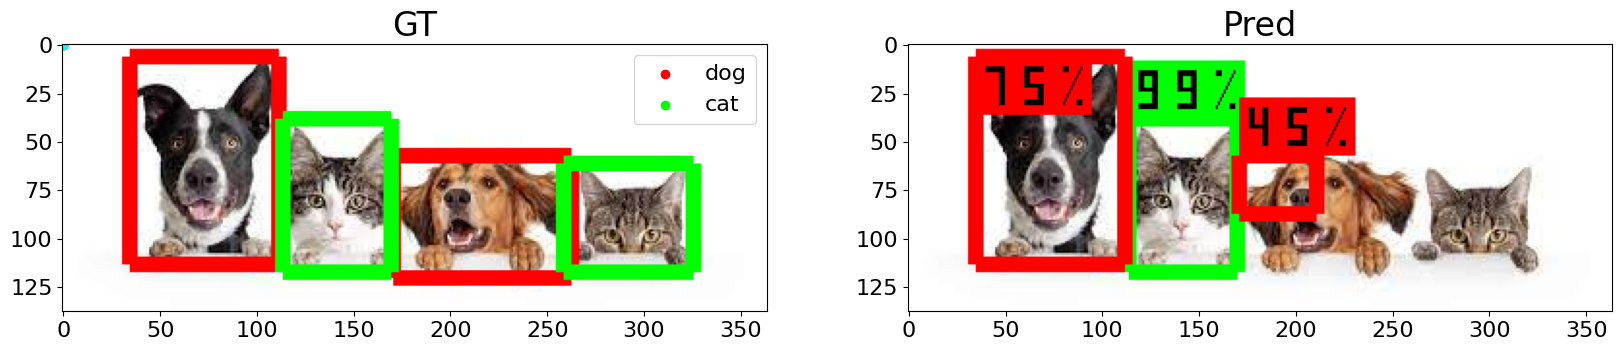

In [8]:
img_path_list = sorted(glob.glob(f"data/coco/pic*.jpg"))
label_path = "data/coco/coco.json"
prediction_dict = json.load(open(f"{ROOT}/example/pred/coco_box.json","r"))

for img_path, case_pred_dict in zip(img_path_list, prediction_dict.values()):
    pd_boxes, pd_cids, pd_cfs = get_pd_boxes_cids_cfs(case_pred_dict)
    show(["dog","cat"], img_path, label_path, "coco", pd_boxes, pd_cids, pd_cfs)

### 5. raw data label `VOC` + prediction `general format`

{'boxes': [[0, 23, 220, 228], [30, 90, 80, 150]], 'preds': [[0.95, 0.05, 0.0], [0.2, 0.8, 0.0]]}


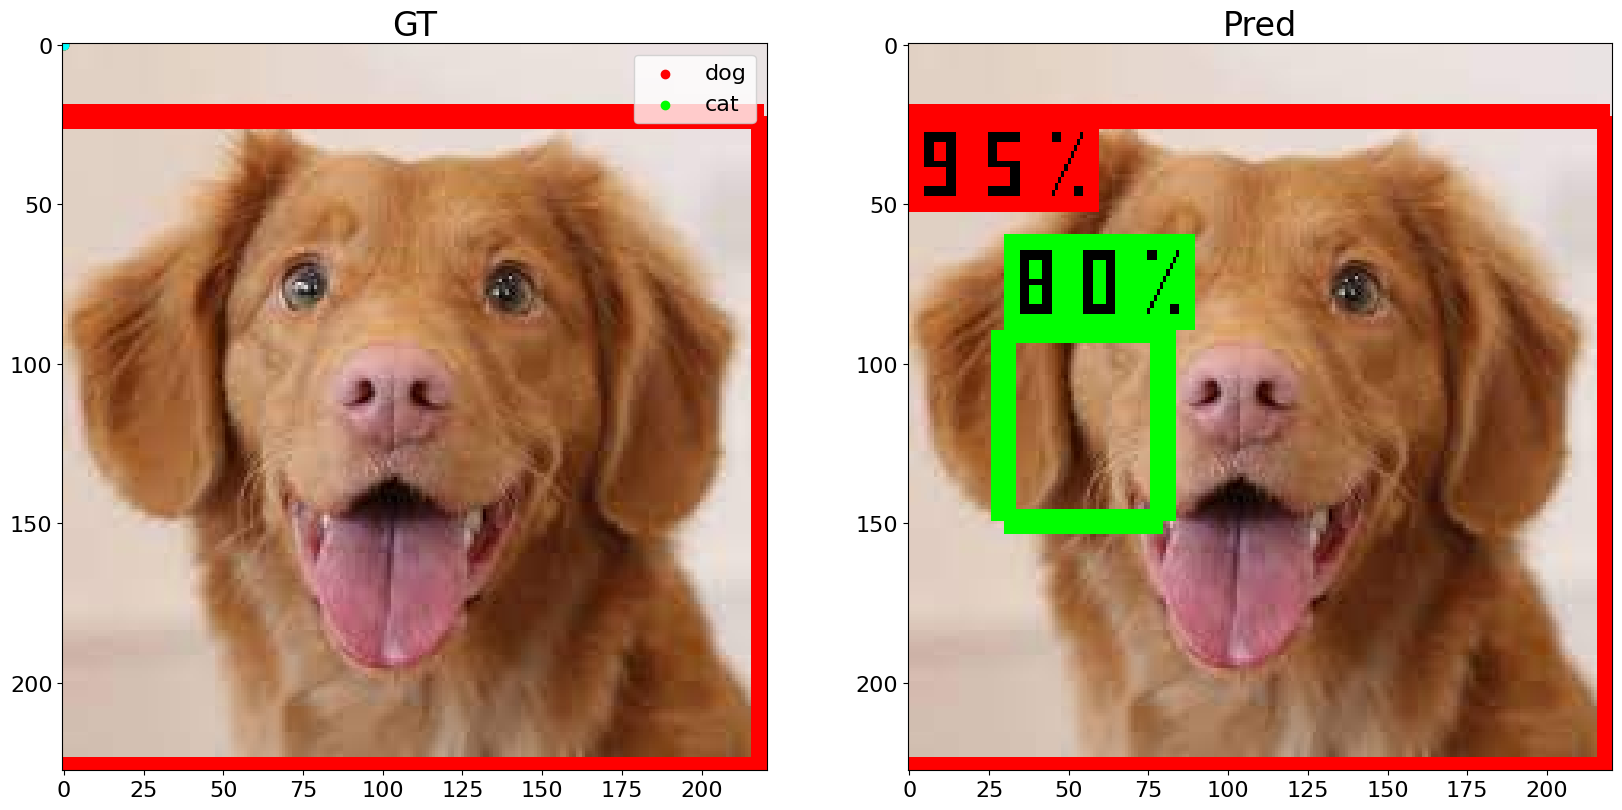

{'boxes': [[8, 15, 715, 630], [733, 64, 1174, 588]], 'preds': [[0.85, 0.05, 0.1], [0.6, 0.4, 0.0]]}


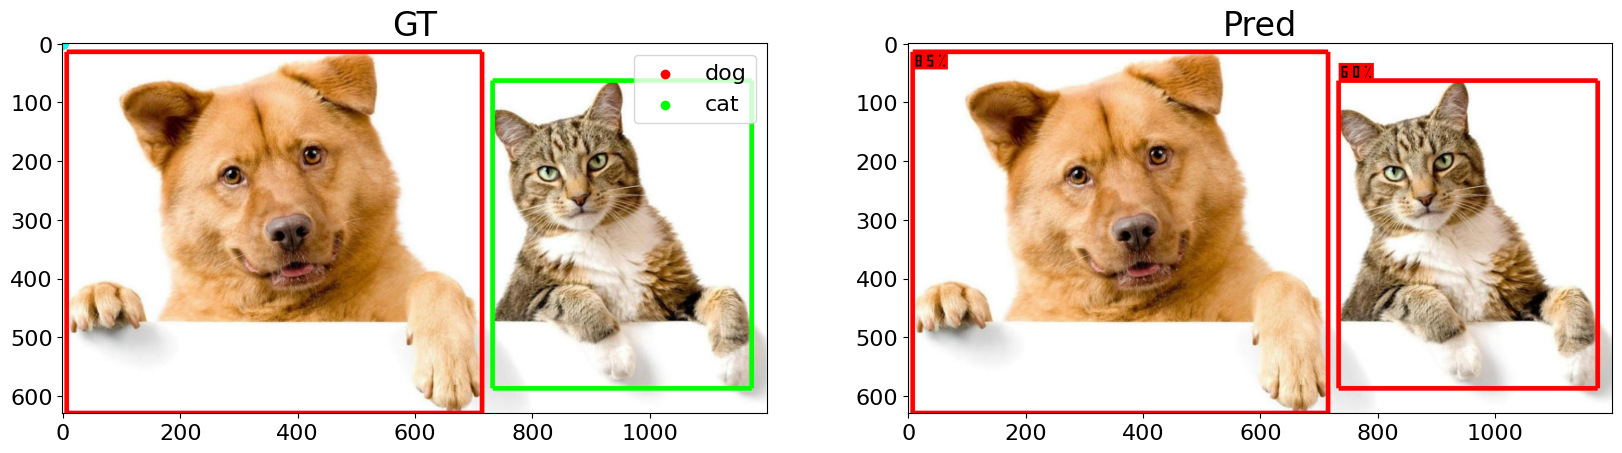

{'boxes': [[35, 7, 112, 114], [171, 58, 211, 88], [114, 39, 170, 118]], 'preds': [[0.75, 0.25, 0.0], [0.45, 0.2, 0.35], [0.01, 0.99, 0.0]]}


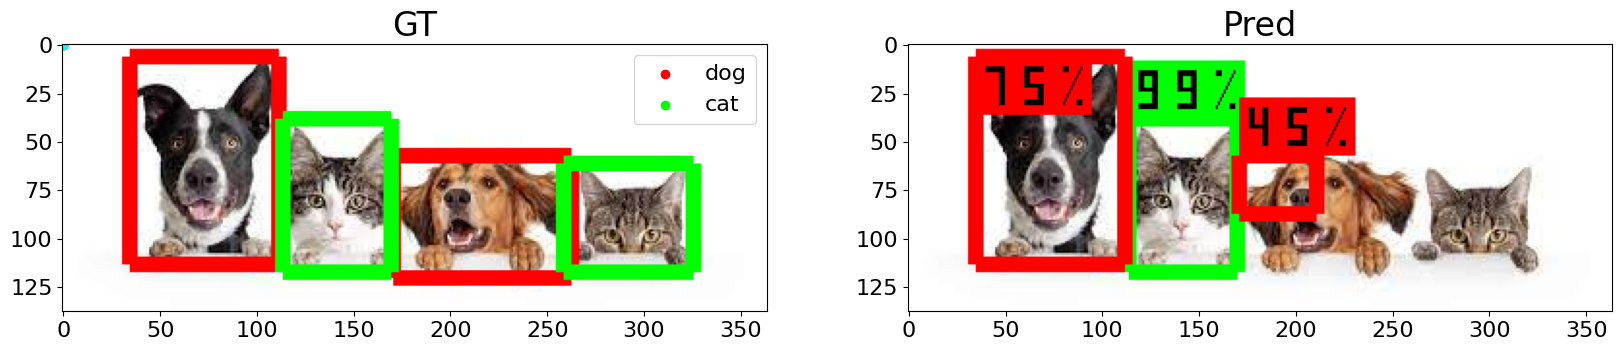

In [10]:
img_path_list = sorted(glob.glob(f"data/voc/pic*.jpg"))
prediction_dict = json.load(open(f"{ROOT}/example/pred/voc_box.json","r"))

for img_path, case_pred_dict in zip(img_path_list, prediction_dict.values()):
    label_path = img_path.replace(".jpg", ".xml")
    pd_boxes, pd_cids, pd_cfs = get_pd_boxes_cids_cfs(case_pred_dict)
    show(["dog","cat"], img_path, label_path, "voc", pd_boxes, pd_cids, pd_cfs)

### 6. raw data label `YOLO` + prediction `general format`

{'boxes': [[0.497738, 0.550439, 0.995475, 0.899123], [0.248869, 0.526316, 0.226244, 0.263158]], 'preds': [[0.95, 0.05, 0.0], [0.2, 0.8, 0.0]]}


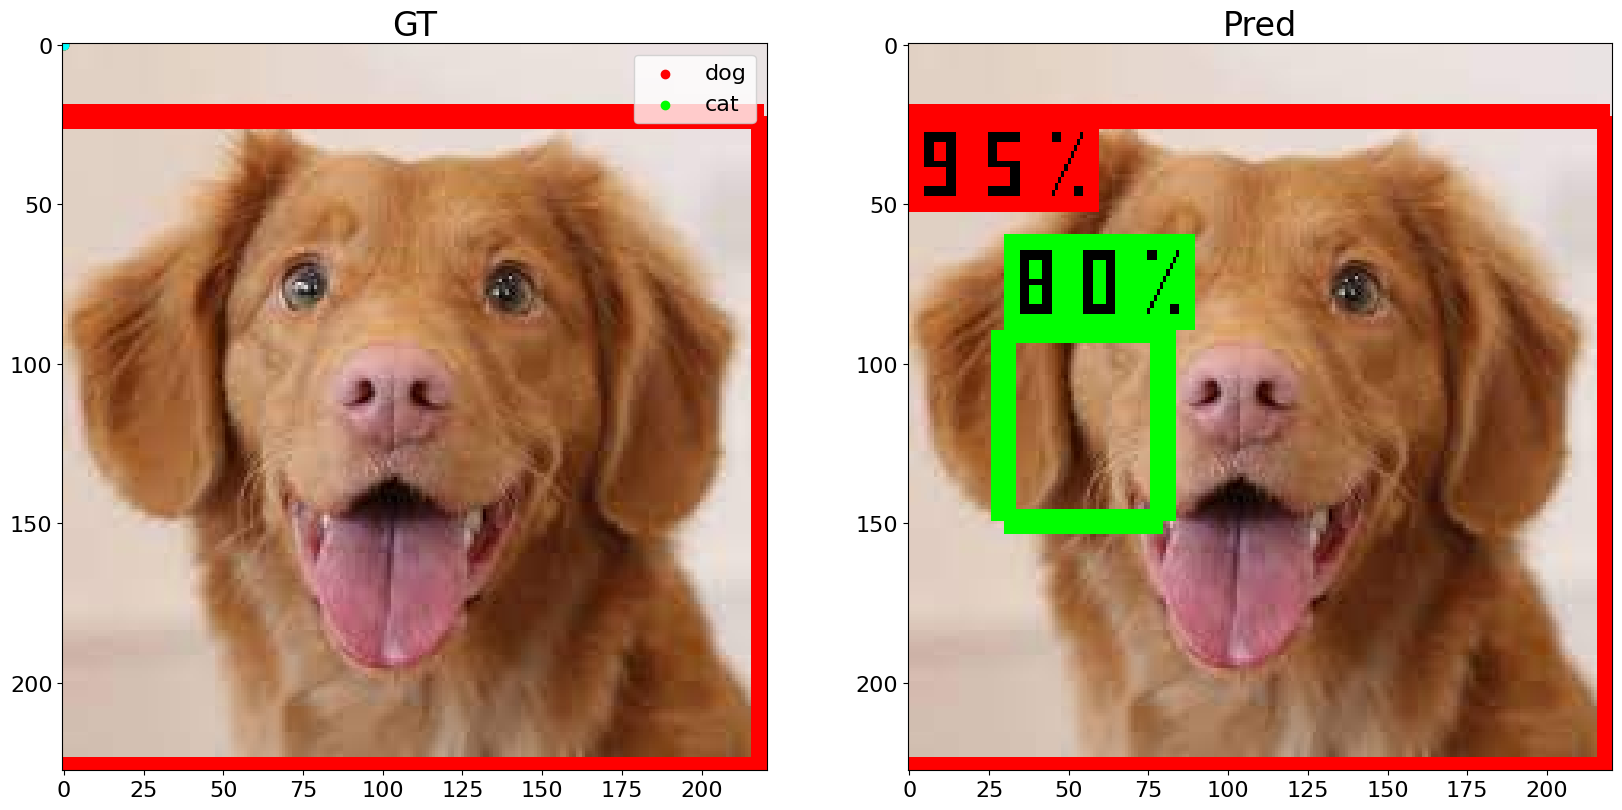

{'boxes': [[0.30125, 0.511905, 0.589167, 0.97619], [0.794583, 0.51746, 0.3675, 0.831746]], 'preds': [[0.85, 0.05, 0.1], [0.6, 0.4, 0.0]]}


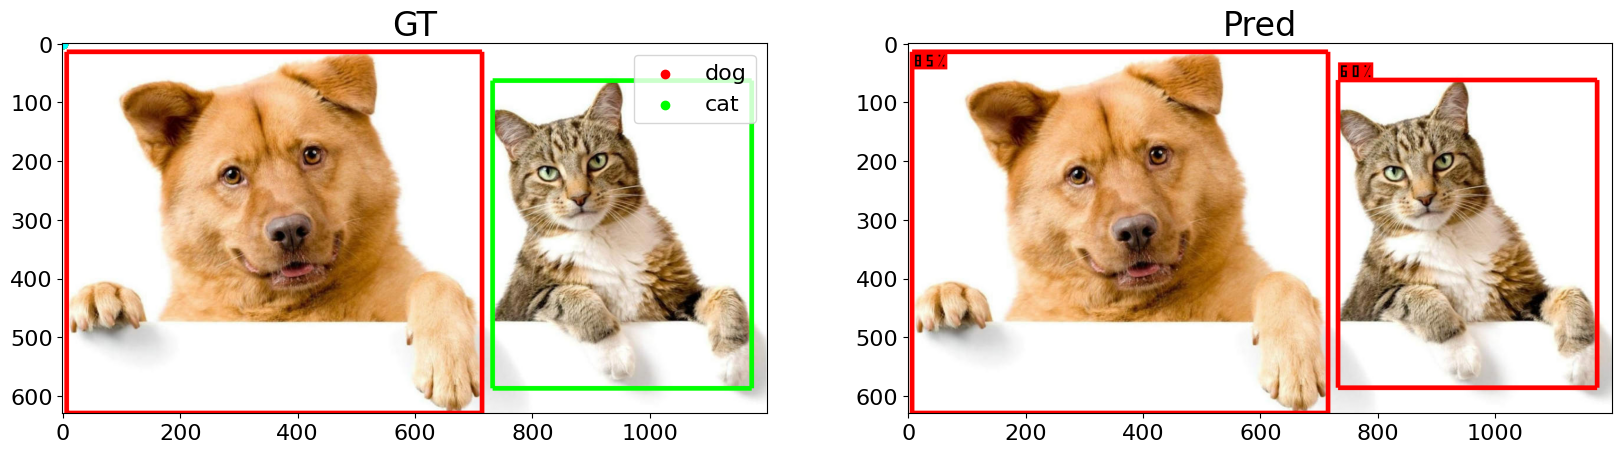

{'boxes': [[0.201923, 0.438406, 0.211538, 0.775362], [0.524725, 0.528986, 0.10989, 0.217391], [0.39011, 0.568841, 0.153846, 0.572464]], 'preds': [[0.75, 0.25, 0.0], [0.45, 0.2, 0.35], [0.01, 0.99, 0.0]]}


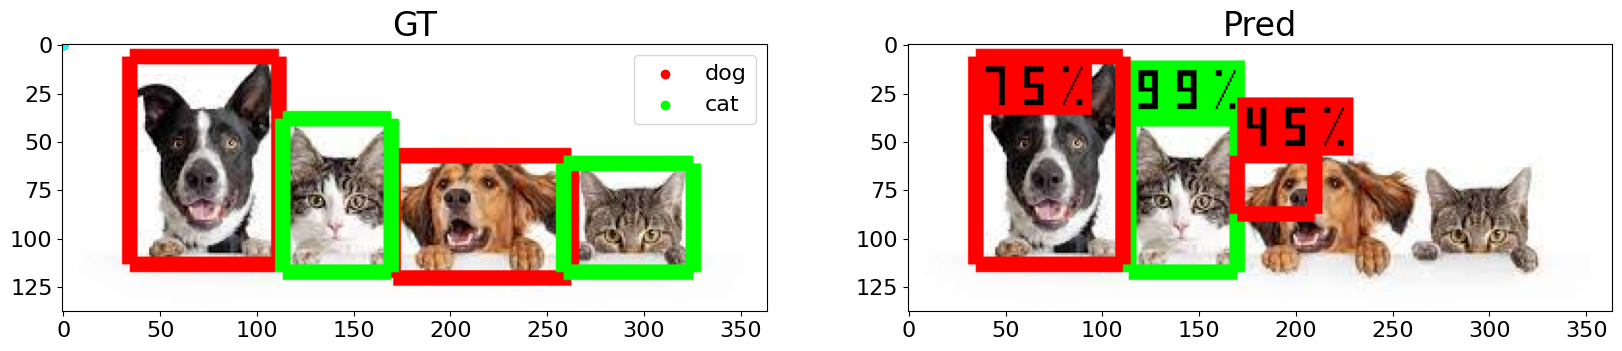

In [9]:
img_path_list = sorted(glob.glob(f"data/yolo/pic*.jpg"))
prediction_dict = json.load(open(f"{ROOT}/example/pred/yolo_box.json","r"))

for img_path, case_pred_dict in zip(img_path_list, prediction_dict.values()):
    label_path = img_path.replace(".jpg", ".txt")
    pd_boxes, pd_cids, pd_cfs = get_pd_boxes_cids_cfs(case_pred_dict)
    show(["dog","cat"], img_path, label_path, "yolo", pd_boxes, pd_cids, pd_cfs)